In [1]:
from K.utils.load import load_train_data_and_split
from K.utils.data_augment_generator import DataAugmentGenerator

/Users/sanghapark/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
COLS = [
    'left_eye_inner_corner_x',      'left_eye_inner_corner_y',
    'left_eye_outer_corner_x',      'left_eye_outer_corner_y',
    'right_eye_inner_corner_x',     'right_eye_inner_corner_y',
    'right_eye_outer_corner_x',     'right_eye_outer_corner_y',
    'left_eyebrow_inner_end_x',     'left_eyebrow_inner_end_y',
    'left_eyebrow_outer_end_x',     'left_eyebrow_outer_end_y',
    'right_eyebrow_inner_end_x',    'right_eyebrow_inner_end_y',
    'right_eyebrow_outer_end_x',    'right_eyebrow_outer_end_y',
    'mouth_left_corner_x',          'mouth_left_corner_y',
    'mouth_right_corner_x',         'mouth_right_corner_y',
    'mouth_center_top_lip_x',       'mouth_center_top_lip_y',
    'Image'
]
FLIP_INDICES = [(0, 4), (1, 5), (2, 6), (3, 7), (8, 12), (9, 13), (10, 14), (11, 15), (16, 18), (17, 19)]


VALIDATION_RATIO = 0.1

In [3]:
X_train, _, Y_train, _ = load_train_data_and_split("data/training.csv", COLS, VALIDATION_RATIO)

In [4]:
generator = DataAugmentGenerator(X_train,
                                 Y_train,
                                 batchsize=100,
                                 flip_indices=FLIP_INDICES,
                                 flip_ratio=0.5,
                                 rotate_ratio=0.5,
                                 contrast_ratio=0.5,
                                 perspective_transform_ratio=0.5,
                                 elastic_transform_ratio=0.5)

In [5]:
def plot_data(img, landmarks, axis):
    """
    Plot image (img), along with normalized facial keypoints (landmarks)
    """
    axis.imshow(np.squeeze(img), cmap='gray') # plot the image
    landmarks = landmarks * 48 + 48 # undo the normalization
    # Plot the keypoints
    axis.scatter(landmarks[0::2], landmarks[1::2], marker='o', c='r', s=20)

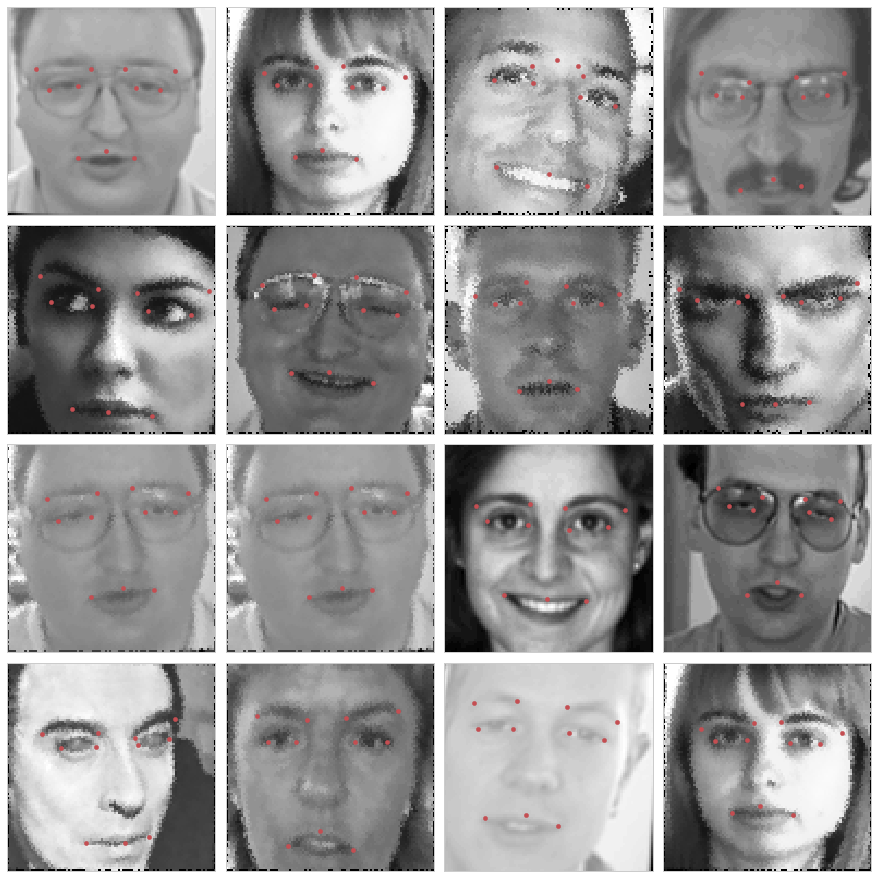

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
import TF.utils.visualize as vis

temp = generator.generate(batchsize=100, flip=True, rotate=True, contrast=True, perspective_transform=True, elastic_transform=True)

for X, Y in temp:
#     idx = random.randint(0, 99)
#     img_raw = (X[idx, :, :, 0].reshape(-1)*255).astype(int)
#     face = Image.new("RGB", (96, 96), "black") 
#     pixels = face.load()
#     for i in range(face.size[0]):
#         for j in range(face.size[1]):
#             pixels[i,j] = (img_raw[i+j*96], img_raw[i+j*96], img_raw[i+j*96])
#     fig = plt.figure(figsize = (4,4))
#     ax1 = fig.add_subplot(111)
#     ax1.set_xticks([])
#     ax1.set_yticks([])
#     ax1.imshow(face, cmap='gray')
    
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(16):
        rnd_idx = random.randint(0, 99)
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        plot_data(X[rnd_idx, :, :, 0], Y[rnd_idx], ax)
    break
    